Plot the voltage signal $x(t)$ `trace1` from the microelectrode array and visually examine it. 
Spikes are very fast downward voltage excursions (sometimes reaching to ~ $ -100 \mu V$), followed 
by a small overshoot (zoom in to few spikes to see what they typically look like).

To get some sense of the signal, **plot a probability distribution function** (properly
normalized, so that $\int dx P (x) = 1$), of $x(t)$. Estimate the error bars on the PDF
by splitting the data multiple times into halves and compute the SD over PDF
estimates constructed from halves of the data. Is there any obvious feature for
negative voltages in the histogram where you could draw a threshold to recognize
the spikes easily? To identify the spikes, you can set a threshold. Scan a range of
thresholds, from $-70 \mu V$ and $-30 \mu V$ ; whenever the signal crosses the threshold
in a downward direction (please pay attention to this definition!), identify a
putative spike, and **plot the number of spikes as a function of the threshold**. By
examining the trace in detail, can you claim that any specific threshold is a good
choice for spike detection?

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from scipy.stats import norm

In [4]:
# Import the data
trace1 = np.loadtxt(fname=('trace1.txt'))

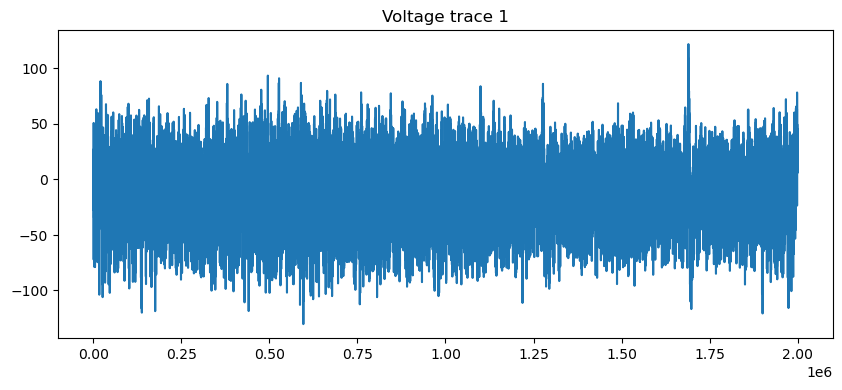

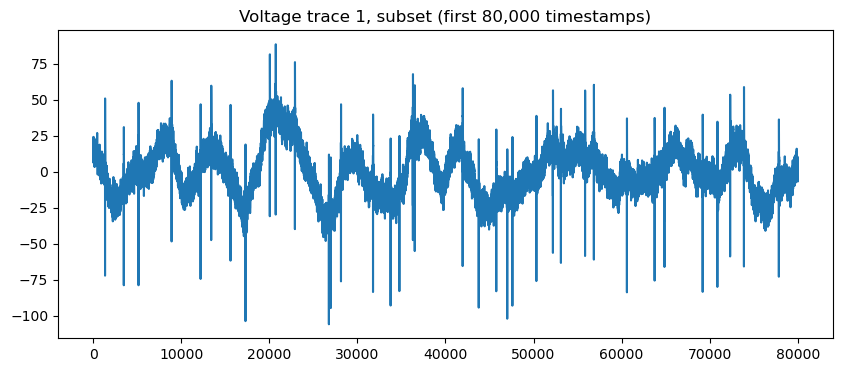

In [140]:
# Plot trace 1
plt.figure(figsize=(10,4))
plt.plot(trace1)
plt.title('Voltage trace 1')
plt.show()

# Plot a subset
plt.figure(figsize=(10,4))
plt.plot(trace1[0:80_000])
plt.title('Voltage trace 1, subset (first 80,000 timestamps)')
plt.show()

To get some sense of the signal, **plot a probability distribution function** (properly
normalized, so that $\int dx P (x) = 1$), of $x(t)$.

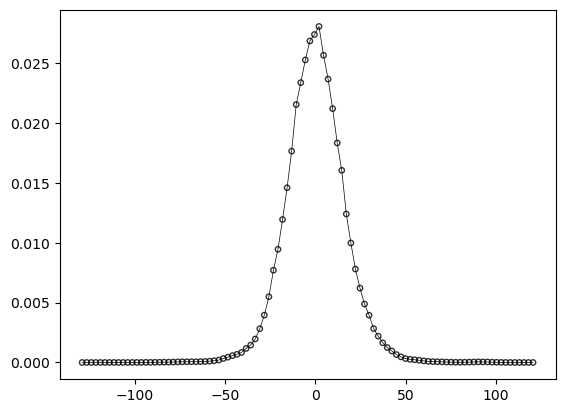

In [142]:
# Plot a histogram
numbins=100
counts, edges = np.histogram(trace1, bins=numbins, density=True)

# Get the center of the bin:
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin

# Plot the histogram:
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')
plt.show()

# print(norm.support())

# # plt.plot(len(trace1), norm.pdf(trace1))
# plt.figure(figsize=(10,5))
# plt.plot(trace1, norm.pdf(trace1))
# plt.show()

The bin size was chosen to be 100 by trial and error. There are only 2022 unique values in the dataset (see below), so e.g. 1000 bins doesn't make sense.

In [15]:
len(np.unique(trace1))

2022

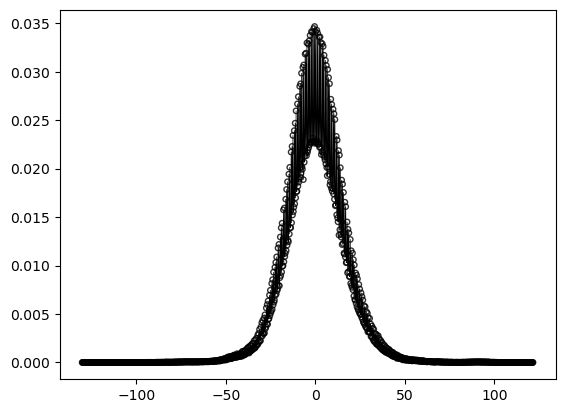

In [87]:
binsize=1000
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin

# Plot the histogram:
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')
plt.show()

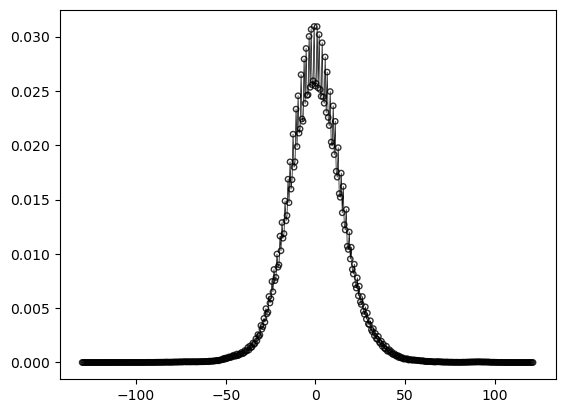

In [92]:
binsize=450
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin

# Plot the histogram:
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')
plt.show()

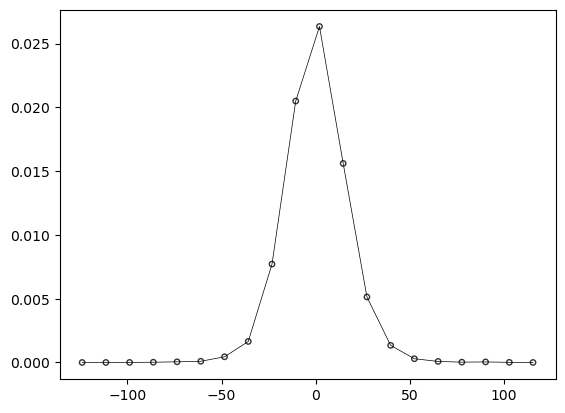

In [86]:
binsize=20
counts, edges = np.histogram(trace1, bins=binsize, density=True)
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin

# Plot the histogram:
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.plot(bin_centers, counts, linewidth=.5, color='k')
plt.show()

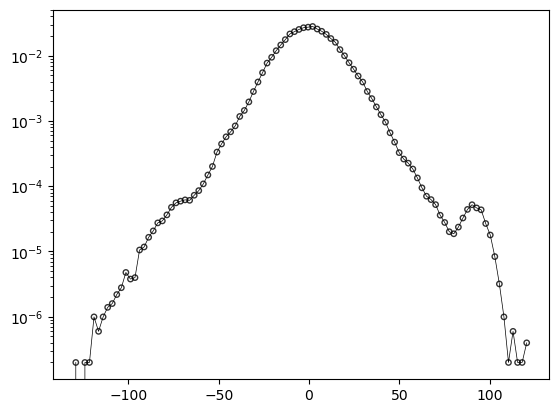

In [137]:
# Plot the histogram on a log scale
counts, edges = np.histogram(trace1, bins=numbins, density=True)

# Get the center of the bin:
bin_centers = (edges[1:]+edges[:-1])/ 2 # take the average of the consecutive edges of each bin

# Plot the histogram:
plt.scatter(bin_centers, counts, marker='o', s=15,facecolors='none', edgecolors='k', alpha=0.8)
plt.yscale('log')
plt.plot(bin_centers, counts, linewidth=.5, color='k')

# # Superimpose a normal distribution
# mu = trace1.mean()
# sigma = trace1.std()
# normdist = stats.norm(mu, sigma)
# x = np.linspace(bin_centers.min(), bin_centers.max(), 1000)
# plt.plot(x, np.log10(normdist.pdf(x)))

plt.show()

**Estimate the error bars** on the PDF
by splitting the data multiple times into halves and compute the SD over PDF
estimates constructed from halves of the data. Is there any obvious feature for
negative voltages in the histogram where you could draw a threshold to recognize
the spikes easily?

In [138]:
subsetSize = len(trace1)/2
repetitions = 10


def bootstrap(data, subsetSize, repetitions):
    '''
    Splits the data  into random halves (not preserving continuity, assuming IID) and calculates the standard deviation (std).
    Input: data, subsetSize = size of the random sample, repetitions = number of times to split the data and compute the std.
    Returns errorBarEstimate, a vector that contains the std estimates.
    '''
    errorBarEstimate = np.zeros(repetitions)
    for run in range(repetitions):
        # randomly select half the data points:
        subset = random.choices(data, k=int(subsetSize))
        # calculate the std and store it:
        errorBarEstimate[run] = np.std(subset)
    return errorBarEstimate

bootstrap(trace1, subsetSize, repetitions)

array([16.11698508, 16.10323469, 16.10237342, 16.11848408, 16.12000272,
       16.10285671, 16.12374745, 16.11166322, 16.10364617, 16.1044863 ])

In [ ]:
counts, edges = nu

To identify the spikes, you can set a threshold. Scan a range of
thresholds, from $-70 \mu V$ and $-30 \mu V$ ; whenever the signal crosses the threshold
in a downward direction (please pay attention to this definition!), identify a
putative spike, and **plot the number of spikes as a function of the threshold**. By
examining the trace in detail, can you claim that any specific threshold is a good
choice for spike detection?